In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the data

In [2]:
d0 = pd.read_csv('train.csv')

In [3]:
d0.shape

(42000, 785)

In [5]:
d0.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# store the labels in saperate dataframe

In [9]:
labels = d0['label']

In [12]:
data = d0.drop('label',axis = 1)

In [13]:
print(data.shape)
print(labels.shape)


(42000, 784)
(42000,)


# In order to apply pca we need to do some preprocessing : standarding the columns
# which means mean = 0 and std = 1

In [37]:
from sklearn.preprocessing import StandardScaler

In [15]:
std_data = StandardScaler().fit_transform(data)

# we will use sklearn

In [16]:
from sklearn import decomposition

# creating object of PCA()

In [17]:
pca = decomposition.PCA()

# defining the dimension, to which we wanted to reduce

In [22]:
pca.n_components = 2

# all the process { covariance matrix , eigen value and eigen vector} done in one line of code

In [23]:
pca_data = pca.fit_transform(std_data)

In [24]:
print(pca_data.shape)

(42000, 2)


# To pca_data we will add the labels and will create new data frame

In [31]:
new_data = np.vstack((pca_data.T,labels)).T

In [32]:
new_df = pd.DataFrame(data = new_data,columns=('1st_P','2nd_P','labels'))

# we will use seaborn to visualize 42000 data points in 2D

In [33]:
import seaborn as sns

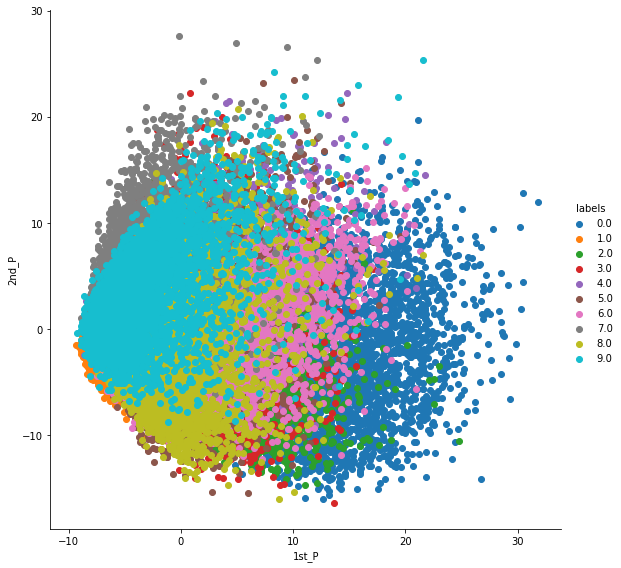

In [38]:
sns.FacetGrid(new_df,hue='labels',height = 8).map(plt.scatter,'1st_P','2nd_P').add_legend()